# Unit 5 - Financial Planning

In [81]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [82]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [83]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3


In [84]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [85]:
btc_reponse_data=requests.get(btc_url).json()
eth_reponse_data=requests.get(eth_url).json()
#print(json.dumps(btc_reponse_data,indent=4))


In [86]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price=btc_reponse_data['data']['1']['quotes']['USD']['price']
my_btc_value=my_btc*btc_price

# Fetch current ETH price
# YOUR CODE HERE!
eth_price=eth_reponse_data['data']['1027']['quotes']['USD']['price']
my_eth_value=my_eth*eth_price
# Compute current value of my crpto
# YOUR CODE HERE!
crypto_value=my_btc_value+my_eth_value


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"the current value of my portfolio is ${crypto_value}")

The current value of your 1.2 BTC is $50882.40
The current value of your 5.3 ETH is $15548.08
the current value of my portfolio is $66430.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [87]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [89]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [91]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-28", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                        SPY  \
                             open     high     low   close   volume     open   
time                                                                           
2019-07-15 00:00:00-04:00  110.87  110.960  110.85  110.93  2190884  301.130   
2019-07-16 00:00:00-04:00  110.75  110.800  110.64  110.80  2059082  300.650   
2019-07-17 00:00:00-04:00  110.93  111.140  110.91  111.13  2281121  298.935   
2019-07-18 00:00:00-04:00  111.10  111.330  111.06  111.30  4360852  297.190   
2019-07-19 00:00:00-04:00  111.22  111.286  111.14  111.23  2391179  300.040   

                                                             
                             high     low   close    volume  
time                                                         
2019-07-15 00:00:00-04:00  301.13  300.19  300.76  26620249  
2019-07-16 00:00:00-04:00  300.88  299.44  299.74  35091780  
2019-07-17 00:00:00-04:00  299.13  297.76  297.77  16886404  
2019-07-18 00:00:00-04:00  299.25  296.70  298.85  45081126  
2019-07-19 00:00:00-04:00  300.07  296.96  297.12  56205349

In [92]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=df_portfolio[['AGG']].iloc[:,3].to_frame().sort_index(ascending=False).max()[0]
spy_close_price=df_portfolio[['SPY']].iloc[:,3].to_frame().sort_index(ascending=False).max()[0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.63
Current SPY closing price: $453.195


In [93]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22659.75
The current value of your 200 AGG shares is $23926.00


### Savings Health Analysis

In [94]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income =12000

# Consolidate financial assets data
# YOUR CODE HERE!

data={'crypto':[my_btc_value+my_eth_value],'shares':[my_agg_value+my_spy_value]}
df_savings=pd.DataFrame.from_dict(data,orient='index',columns=['amount'])
# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
crypto,66430.48
shares,46585.75


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

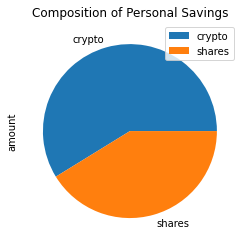

In [95]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")

In [100]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
my_total_savings=(data['crypto'][0]+data['shares'][0])

# Validate saving health
# YOUR CODE HERE!
if my_total_savings> emergency_fund:
    print('Congrats on getting your life together!')
elif my_total_savings==emergency_fund:
    print('You reached your financial goal')
else:
    print(f"you are ${emergency_fund-my_total_savings} away from your financial goal")

Congrats on getting your life together


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [101]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-28', tz='America/New_York').isoformat()

In [102]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
# Set the tickers
tickers = ["AGG", "SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df


# Display sample data
df_stock_data.head()




AGG                                        SPY  \
                             open     high     low   close   volume     open   
time                                                                           
2019-07-15 00:00:00-04:00  110.87  110.960  110.85  110.93  2190884  301.130   
2019-07-16 00:00:00-04:00  110.75  110.800  110.64  110.80  2059082  300.650   
2019-07-17 00:00:00-04:00  110.93  111.140  110.91  111.13  2281121  298.935   
2019-07-18 00:00:00-04:00  111.10  111.330  111.06  111.30  4360852  297.190   
2019-07-19 00:00:00-04:00  111.22  111.286  111.14  111.23  2391179  300.040   

                                                             
                             high     low   close    volume  
time                                                         
2019-07-15 00:00:00-04:00  301.13  300.19  300.76  26620249  
2019-07-16 00:00:00-04:00  300.88  299.44  299.74  35091780  
2019-07-17 00:00:00-04:00  299.13  297.76  297.77  16886404  
2019-07-18 00:00:00-04:00  299.25  296.70  298.85  45081126  
2019-07-19 00:00:00-04:00  300.07  296.96  297.12  56205349

In [118]:
#Create Weights

agg_weight=.4#my_agg_value/(my_agg_value+my_spy_value)
spy_weight=.6#my_spy_value/(my_agg_value+my_spy_value)

#Create function to perform simulation


def MC_year_func(df_data,agg_weight,spy_weight,number_of_simulations,number_trading_days):
        
        weight_list=[agg_weight,spy_weight]

        return MCSimulation(
            portfolio_data = df_data,
            weights = weight_list,
            num_simulation = number_of_simulations,
            num_trading_days=number_trading_days

        )
def MC_results( MC_obj,isPlotDistribution =False,isPlotSimulation=False,CI95Lower=False,CI95UPPER=False,title=''):

    if isPlotSimulation==True:

        plot_var=MC_obj.plot_simulation()
        return plot_var.get_figure().savefig(title, bbox_inches="tight")

    elif isPlotDistribution==True:
        plot_var=MC_obj.plot_distribution()
        return plot_var.get_figure().savefig(title, bbox_inches="tight")
        
    elif CI95Lower==True:
        
        return MC_obj.summarize_cumulative_return()[8]
    elif CI95UPPER==True:
        return MC_obj.summarize_cumulative_return()[9]



In [106]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#YOUR CODE HERE!
# MC_30year = MCSimulation(
#     portfolio_data = df_stock_data,
#     weights = [agg_weight,spy_weight],
#     num_simulation = 500,
#     num_trading_days = 252*30
# )

MC_30year = MC_year_func (df_data=df_stock_data, agg_weight= agg_weight,spy_weight= spy_weight, number_of_simulations=500, number_trading_days=252*30)

In [107]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2019-07-15 00:00:00-04:00  110.87  110.960  110.85  110.93  2190884   
2019-07-16 00:00:00-04:00  110.75  110.800  110.64  110.80  2059082   
2019-07-17 00:00:00-04:00  110.93  111.140  110.91  111.13  2281121   
2019-07-18 00:00:00-04:00  111.10  111.330  111.06  111.30  4360852   
2019-07-19 00:00:00-04:00  111.22  111.286  111.14  111.23  2391179   

                                            SPY                          \
                          daily_return     open    high     low   close   
time                                                                      
2019-07-15 00:00:00-04:00          NaN  301.130  301.13  300.19  300.76   
2019-07-16 00:00:00-04:00    -0.001172  300.650  300.88  299.44  299.74   
2019-07-17 00:00:00-04:00     0.002978  298.935  299.13  297.76  297.77   
2019-07-18 00:00:00-04:00     0.001530  297.190  299.25  296.70  298.85   
2019-07-19 00:00:00-04:00    -0.000629  300.040  300.07  296.96  297.12   

                                                  
                             volume daily_return  
time                                              
2019-07-15 00:00:00-04:00  26620249          NaN  
2019-07-16 00:00:00-04:00  35091780    -0.003391  
2019-07-17 00:00:00-04:00  16886404    -0.006572  
2019-07-18 00:00:00-04:00  45081126     0.003627  
2019-07-19 00:00:00-04:00  56205349    -0.005789

In [108]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998112,1.001237,1.010638,0.984891,1.014002,1.011885,0.991644,1.016228,1.010172,0.989294,...,1.003086,1.011073,0.996245,0.996407,1.012573,0.995543,0.998431,1.004915,1.011110,0.986046
2,0.990654,1.002867,1.005266,0.977898,1.007530,1.009917,0.993651,1.027221,1.016100,0.998657,...,1.002411,0.997755,0.987857,0.994888,1.021719,0.986988,0.985041,1.002593,1.003694,0.983745
3,0.975178,0.997213,1.012571,0.969222,0.998840,1.017350,0.996145,1.029641,1.008686,1.005328,...,0.990732,1.000570,1.003231,0.993609,1.007484,0.990904,0.978210,0.995064,1.002681,0.991046
4,0.965067,0.998998,1.008324,0.973106,0.996994,1.019234,0.992431,1.049866,0.988411,1.001483,...,0.985211,0.980211,1.009496,0.992327,0.988816,0.980609,0.974544,0.985464,1.004716,0.983009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.104346,54.435108,27.789946,30.914318,6.169185,20.868718,16.343121,14.750811,70.284376,30.436445,...,14.865879,13.184484,37.726123,29.082557,13.304673,11.599813,50.016829,19.130291,21.339171,32.145455
7557,6.130362,55.042700,27.910211,31.365384,6.193845,20.638980,16.351207,14.850277,70.421169,30.562412,...,14.781690,13.246663,37.396140,29.198912,13.242113,11.692074,49.037383,18.821932,21.495753,32.440556
7558,6.101942,55.192752,28.074506,30.961745,6.154713,20.670786,16.092789,14.788596,69.865792,30.648442,...,14.715576,13.442389,37.691944,29.056380,13.313043,11.668128,48.415498,18.956795,21.842650,32.428291
7559,6.103603,56.015405,28.283375,30.951562,6.129174,20.470954,16.063676,14.750757,69.386809,30.874005,...,14.470762,13.534089,37.322281,29.121113,13.276835,11.693581,48.527931,18.873893,21.758183,32.895509


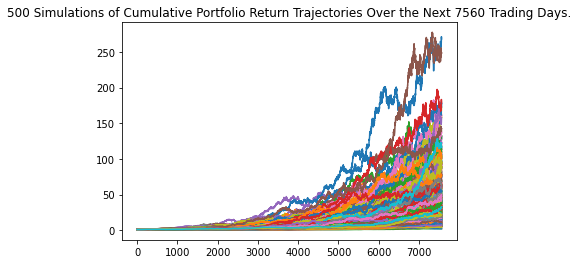

In [111]:
# Plot simulation outcomes
# YOUR CODE HERE!
#line_plot =MC_30year.plot_simulation()
#line_plot.get_figure().savefig("500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days", bbox_inches="tight")


MC_results(MC_30year,isPlotSimulation=True,title='500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days')

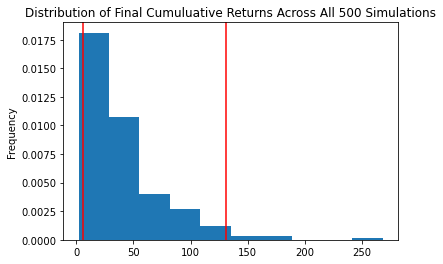

In [113]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
#dist_plot = MC_30year.plot_distribution()
#dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

MC_results(MC_30year,isPlotDistribution=True,title='Distribution of Final Cumulative Returns Accross All 500 Simulations')

### Retirement Analysis

In [115]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl=MC_30year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             40.804216
std              35.981230
min               2.098012
25%              16.238909
50%              29.222301
75%              52.092155
max             268.147452
95% CI Lower      5.925679
95% CI Upper    130.672371
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [120]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=initial_investment*MC_results(MC_30year,CI95Lower=True)
ci_upper=initial_investment*MC_results(MC_30year,CI95UPPER=True)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $118513.58 and $2613447.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [121]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=initial_investment*MC_results(MC_30year,CI95Lower=True)
ci_upper=initial_investment*MC_results(MC_30year,CI95UPPER=True)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $177770.37719858694 and $3920171.1359965513


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [67]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [my_agg_value/(my_agg_value+my_spy_value),my_spy_value/(my_agg_value+my_spy_value)],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [68]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997302,0.994430,0.998334,1.010268,0.992701,1.014407,0.989928,1.014677,1.007010,0.980206,...,1.000179,1.001968,1.011032,1.001756,1.010250,0.998035,1.005700,0.990308,0.999725,0.996704
2,1.002700,0.994955,0.992021,1.009081,1.005738,0.995730,0.975950,1.015384,1.025436,0.980909,...,0.984847,0.990708,1.011160,1.002971,1.009419,0.989480,1.011738,0.994028,0.989130,0.999513
3,1.000784,1.004639,0.997996,1.002636,1.002093,1.007433,0.975827,1.030045,1.029834,0.980196,...,0.993468,1.001307,1.007406,1.002444,1.005067,1.016294,1.026354,1.002716,0.985655,0.990689
4,1.017022,0.998358,1.000320,1.004151,0.998271,1.021528,0.967612,1.048440,1.020196,0.993265,...,1.000484,1.003405,0.995327,0.999042,0.995315,1.010670,1.037445,1.004611,0.985888,0.991258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.714085,1.893242,1.367075,2.575170,0.997491,1.544182,1.480245,2.573149,1.136747,0.892522,...,1.200481,2.781974,1.493021,1.629092,2.827774,1.812888,2.546030,1.051025,1.030232,1.143906
1257,1.715051,1.928775,1.353791,2.532359,0.996704,1.532055,1.483132,2.563670,1.130356,0.897694,...,1.194800,2.774686,1.498301,1.614222,2.859966,1.823134,2.566460,1.041093,1.038045,1.146658
1258,1.721161,1.909484,1.358738,2.548583,0.986262,1.513627,1.486609,2.523954,1.129672,0.897416,...,1.195166,2.754719,1.522146,1.602188,2.873838,1.820550,2.582214,1.048482,1.043627,1.143225
1259,1.729890,1.940418,1.332832,2.553233,0.990279,1.515879,1.490540,2.520232,1.126194,0.902648,...,1.190680,2.743410,1.535168,1.609172,2.854898,1.819920,2.598466,1.057809,1.052948,1.153892


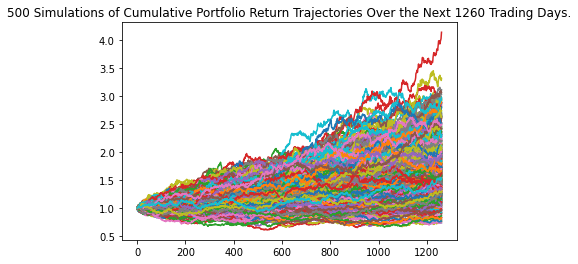

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
five_year_plot=MC_Fiveyear.plot_simulation()

five_year_plot.get_figure().savefig('500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days', bbox_inches="tight")

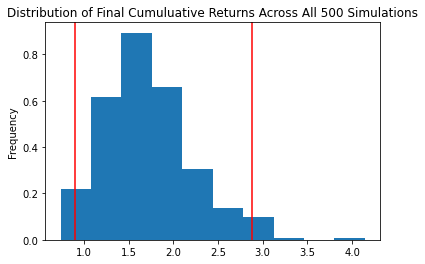

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
five_year_plot_dist=MC_Fiveyear.plot_distribution()

five_year_plot_dist.get_figure().savefig('Distribution of Final Cumulative Returns Accross All 500 Simulations', bbox_inches="tight")

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl=MC_Fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.715181
std               0.495746
min               0.739973
25%               1.375184
50%               1.649250
75%               1.995070
max               4.142570
95% CI Lower      0.907028
95% CI Upper      2.882173
Name: 1260, dtype: float64


In [49]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five=tbl[8]*initial_investment
ci_upper_five=tbl[9]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54421.69011662053 and $172930.3715259804


### Ten Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#YOUR CODE HERE!
# MC_Tenyear = MCSimulation(
#     portfolio_data = df_stock_data,
#     weights = [my_agg_value/(my_agg_value+my_spy_value),my_spy_value/(my_agg_value+my_spy_value)],
#     num_simulation = 500,
#     num_trading_days = 252*10
# )

MC_Tenyear= MC_year_func(df_data=df_stock_data, agg_weight= agg_weight,spy_weight= spy_weight, number_of_simulations=500, number_trading_days=252*10)

In [61]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991964,0.999879,0.985658,1.002257,0.991081,0.994002,1.007091,0.988117,1.016138,0.995023,...,0.988095,0.999998,0.992703,0.992960,1.009330,0.994223,1.017766,0.992660,0.991049,1.007409
2,0.987860,1.001327,0.977407,0.996616,0.990617,0.994193,1.001164,0.993047,1.016036,0.995247,...,0.991903,1.003826,0.986837,1.001546,1.002102,1.009281,1.023640,0.988736,1.007741,1.011167
3,0.985510,1.003208,0.975297,1.001196,0.986690,1.005456,0.998086,0.994943,1.022985,1.008957,...,0.976449,0.998862,0.982030,1.002518,1.011341,1.010069,1.014108,0.997043,1.011220,1.009360
4,0.991086,1.006567,0.982410,0.999479,0.994571,1.009291,0.997027,0.994951,1.037363,1.012261,...,0.973740,0.992368,0.978919,1.003980,1.001098,1.015711,1.013713,0.994382,1.017720,1.011155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.545217,2.692964,2.510047,6.066027,2.235781,3.996032,3.136971,4.673816,2.153123,2.342991,...,0.877232,2.149445,4.154317,1.545044,1.865412,1.640583,2.187709,0.668922,5.444470,4.510396
2517,2.520285,2.729650,2.514998,6.027490,2.274360,4.005586,3.158790,4.675055,2.133605,2.356691,...,0.880946,2.143807,4.113842,1.530301,1.858720,1.645570,2.181544,0.665940,5.491608,4.455100
2518,2.525955,2.760484,2.515888,5.946505,2.280659,4.043823,3.153141,4.652735,2.112432,2.358384,...,0.880876,2.183836,4.040038,1.529969,1.857485,1.636850,2.211832,0.657766,5.433446,4.538370
2519,2.534005,2.770398,2.483438,5.965480,2.301160,4.076143,3.182894,4.629769,2.116137,2.376468,...,0.871661,2.202180,4.064278,1.535726,1.814406,1.632191,2.220230,0.670988,5.563422,4.543203


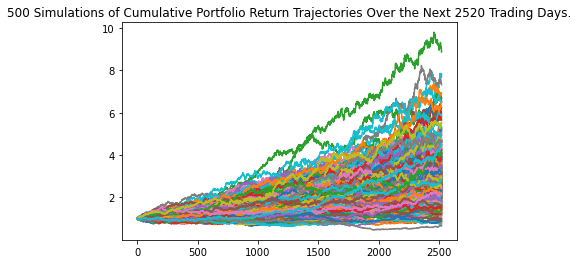

In [63]:
# Plot simulation outcomes
# YOUR CODE HERE!

ten_year_plot=MC_Tenyear.plot_simulation()

five_year_plot.get_figure().savefig('500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days', bbox_inches="tight")

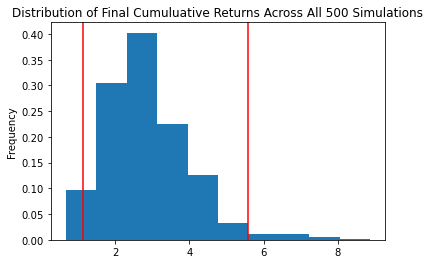

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ten_year_dist =MC_Tenyear.plot_distribution()

ten_year_plot.get_figure().savefig('Distribution of Final Cumulative Returns Accross All 500 Simulations', bbox_inches="tight")

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!






# Print summary statistics
# YOUR CODE HERE!


AttributeError: 'AxesSubplot' object has no attribute 'summarize_cumulative_return'

In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
